In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(10, input_shape=(100, 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2023-09-16 09:03:11.003609: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-16 09:03:11.003639: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-16 09:03:11.003645: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-16 09:03:11.004180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-16 09:03:11.004478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
import numpy as np

X_train = np.random.random((1000, 100, 1))
y_train = np.random.randint(2, size=(1000, 1))

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-09-16 09:03:15.185629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-16 09:03:15.486534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-16 09:03:17.801393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 6s 39ms/step - loss: 0.6921
Epoch 2/10
32/32 [==============================] - 1s 17ms/step - loss: 0.6919
Epoch 3/10
32/32 [==============================] - 1s 21ms/step - loss: 0.6916
Epoch 4/10
32/32 [==============================] - 1s 18ms/step - loss: 0.6915
Epoch 5/10
32/32 [==============================] - 1s 17ms/step - loss: 0.6913
Epoch 6/10
32/32 [==============================] - 1s 17ms/step - loss: 0.6913
Epoch 7/10
32/32 [==============================] - 1s 18ms/step - loss: 0.6917
Epoch 8/10
32/32 [==============================] - 1s 18ms/step - loss: 0.6913
Epoch 9/10
32/32 [==============================] - 1s 21ms/step - loss: 0.6914
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 0.6917


In [14]:
len(X_train[0])

100

In [8]:
len(y_train)

1000

In [3]:
weights = model.layers[0].get_weights()
weights

[array([[ 0.10063591,  0.2583147 , -0.11122523,  0.18995431, -0.00153703,
         -0.33548278, -0.1428392 , -0.17577587, -0.25522768,  0.16329952,
          0.1612131 ,  0.31419283, -0.27840626,  0.07683276, -0.21044554,
         -0.355992  , -0.2846952 , -0.29582375, -0.20602176, -0.23880036,
          0.2249617 , -0.24239057,  0.25672585, -0.21617915, -0.23093615,
          0.04159534,  0.17314744,  0.39017975, -0.02929887,  0.19010213,
         -0.34857383, -0.10134298, -0.36608952, -0.18278785,  0.3224577 ,
          0.14822873,  0.30966508, -0.30734769,  0.10880143,  0.22131082]],
       dtype=float32),
 array([[ 2.97415495e-01,  2.01572478e-01, -3.57911699e-02,
          6.06893711e-02, -9.97590199e-02, -4.01038639e-02,
         -1.18061408e-01,  3.45943905e-02, -3.93691584e-02,
         -6.94545582e-02,  6.84226900e-02,  1.57422528e-01,
          1.08618720e-03,  1.62090093e-01,  1.27415374e-01,
         -1.74268752e-01,  2.27197573e-01, -2.99086776e-02,
          2.65055448e-0

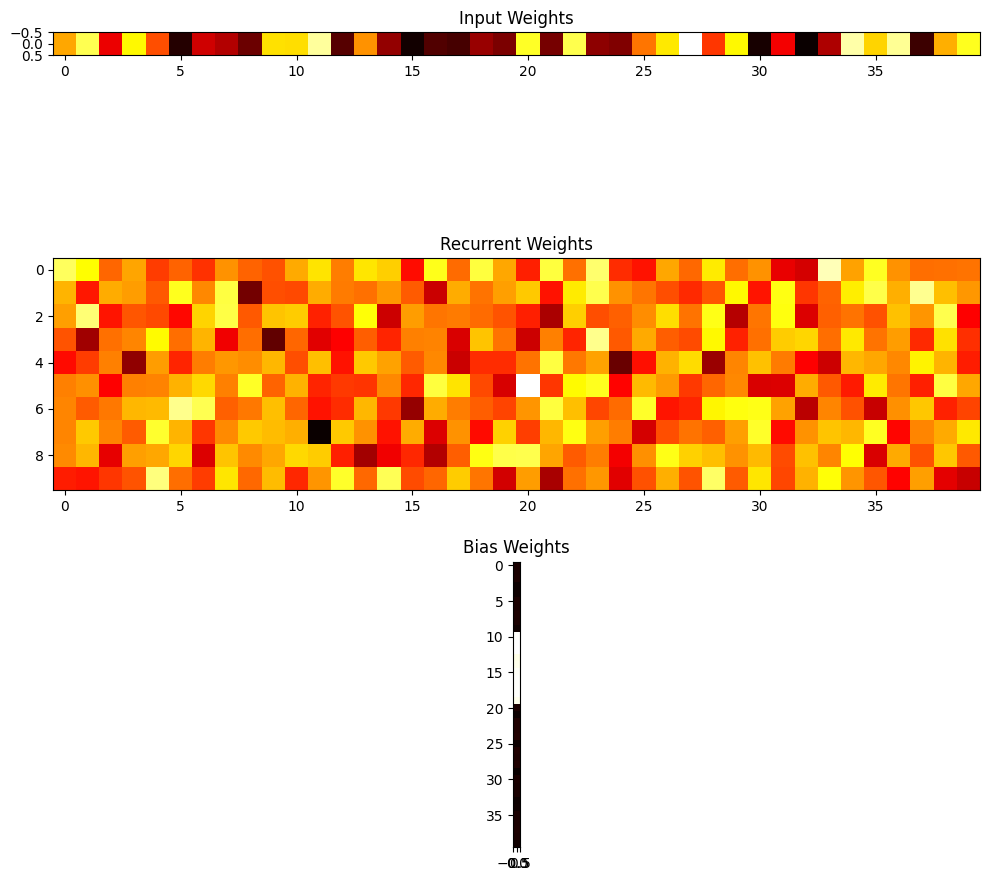

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(10, 10))

axs[0].imshow(weights[0], cmap='hot', interpolation='nearest')
axs[0].set_title('Input Weights')

axs[1].imshow(weights[1], cmap='hot', interpolation='nearest')
axs[1].set_title('Recurrent Weights')

axs[2].imshow(weights[2].reshape(-1, 1), cmap='hot', interpolation='nearest')
axs[2].set_title('Bias Weights')

plt.tight_layout()
plt.show()